In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

#plt.rcParams["figure.figsize"]=(30,15)

In [2]:
df = pd.read_csv("data/4_tabla_sin_nulos_sin_outliers.csv", index_col = 0)
df.head(2)

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
0,50-54,Man,India,5-10 years,"25,000-29,999",Manufacturing/Fabrication,Other,25000.0,29999.0,Asia
1,50-54,Man,Indonesia,20+ years,"60,000-69,999",Manufacturing/Fabrication,Program/Project Manager,60000.0,69999.0,Asia


In [3]:
df_media_pais = df.groupby("pais").mean().reset_index()
df_media_pais

/tmp/ipykernel_342/300188678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_media_pais = df.groupby("pais").mean().reset_index()


,pais,rango_salario_minimo,rango_salario_maximo
0,Algeria,8136.363636,11135.363636
1,Argentina,14793.233083,18773.436090
2,Australia,64523.333333,76809.000000
3,Austria,36200.000000,43384.714286
4,Bangladesh,5441.379310,7478.310345
...,...,...,...
61,Ukraine,16041.666667,20394.833333
62,United Arab Emirates,35522.388060,42864.671642
63,United Kingdom of Great Britain and Northern I...,49395.238095,59041.857143
64,United States of America,60146.226415,72074.900515


In [4]:
df_media_pais2 = df.groupby(["pais", "continente"]).mean().reset_index()
df_media_pais2

/tmp/ipykernel_342/3499309465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_media_pais2 = df.groupby(["pais", "continente"]).mean().reset_index()


,pais,continente,rango_salario_minimo,rango_salario_maximo
0,Algeria,Africa,8136.363636,11135.363636
1,Argentina,America,14793.233083,18773.436090
2,Australia,Oceania,64523.333333,76809.000000
3,Austria,Europa,36200.000000,43384.714286
4,Bangladesh,Asia,5441.379310,7478.310345
...,...,...,...,...
61,Ukraine,Europa,16041.666667,20394.833333
62,United Arab Emirates,Asia,35522.388060,42864.671642
63,United Kingdom of Great Britain and Northern I...,Europa,49395.238095,59041.857143
64,United States of America,America,60146.226415,72074.900515


In [5]:
df_media_pais3 = df.groupby(["pais", "continente"]).median().reset_index()
df_media_pais3

/tmp/ipykernel_342/3667128405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_media_pais3 = df.groupby(["pais", "continente"]).median().reset_index()


,pais,continente,rango_salario_minimo,rango_salario_maximo
0,Algeria,Africa,500.0,1499.0
1,Argentina,America,7500.0,9999.0
2,Australia,Oceania,70000.0,79999.0
3,Austria,Europa,40000.0,49999.0
4,Bangladesh,Asia,1000.0,1999.0
...,...,...,...,...
61,Ukraine,Europa,5000.0,7499.0
62,United Arab Emirates,Asia,15000.0,19999.0
63,United Kingdom of Great Britain and Northern I...,Europa,50000.0,59999.0
64,United States of America,America,70000.0,79999.0


In [6]:
df_media_pais4 = df.groupby(["edad", "genero", "pais", "continente", "años_programando", "salario_anual", "sector_trabajo_actual", "puesto_trabajo"])["rango_salario_maximo"].median().reset_index()
df_media_pais4

,edad,genero,pais,continente,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_maximo
0,18-21,Man,Argentina,America,1-3 years,"60,000-69,999",Accounting/Finance,Data Scientist,69999.0
1,18-21,Man,Argentina,America,5-10 years,$0-999,Hospitality/Entertainment/Sports,Other,999.0
2,18-21,Man,Argentina,America,I have never written code,$0-999,Medical/Pharmaceutical,Other,999.0
3,18-21,Man,Australia,Oceania,< 1 years,$0-999,Academics/Education,Data Analyst,999.0
4,18-21,Man,Australia,Oceania,< 1 years,$0-999,Other,Data Scientist,999.0
...,...,...,...,...,...,...,...,...,...
13280,70+,Woman,Malaysia,Asia,I have never written code,"4,000-4,999",Academics/Education,Data Scientist,4999.0
13281,70+,Woman,Russia,Asia,10-20 years,"7,500-9,999",Academics/Education,Other,9999.0
13282,70+,Woman,United States of America,America,1-3 years,$0-999,Medical/Pharmaceutical,Business Analyst,999.0
13283,70+,Woman,United States of America,America,10-20 years,"100,000-124,999",Government/Public Service,Data Scientist,124999.0


In [7]:
df[df["pais"] == "Algeria"]

,edad,genero,pais,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_minimo,rango_salario_maximo,continente
759,25-29,Man,Algeria,1-3 years,$0-999,Online Business/Internet-based Sales,Other,0.0,999.0,Africa
1630,45-49,Man,Algeria,< 1 years,$0-999,Non-profit/Service,Other,0.0,999.0,Africa
4083,50-54,Man,Algeria,I have never written code,"4,000-4,999",Government/Public Service,Other,4000.0,4999.0,Africa
6769,50-54,Woman,Algeria,10-20 years,"1,000-1,999",Other,Research Scientist,1000.0,1999.0,Africa
7800,30-34,Man,Algeria,3-5 years,"15,000-19,999",Shipping/Transportation,Data Scientist,15000.0,19999.0,Africa
11346,45-49,Man,Algeria,I have never written code,"30,000-39,999",Academics/Education,Business Analyst,30000.0,39999.0,Africa
11681,25-29,Man,Algeria,1-3 years,$0-999,Academics/Education,Research Scientist,0.0,999.0,Africa
13144,25-29,Man,Algeria,< 1 years,"1,000-1,999",Marketing/CRM,Statistician,1000.0,1999.0,Africa
13800,35-39,Man,Algeria,1-3 years,$0-999,Medical/Pharmaceutical,Other,0.0,999.0,Africa
14332,30-34,Man,Algeria,10-20 years,$0-999,Computers/Technology,Research Scientist,0.0,999.0,Africa


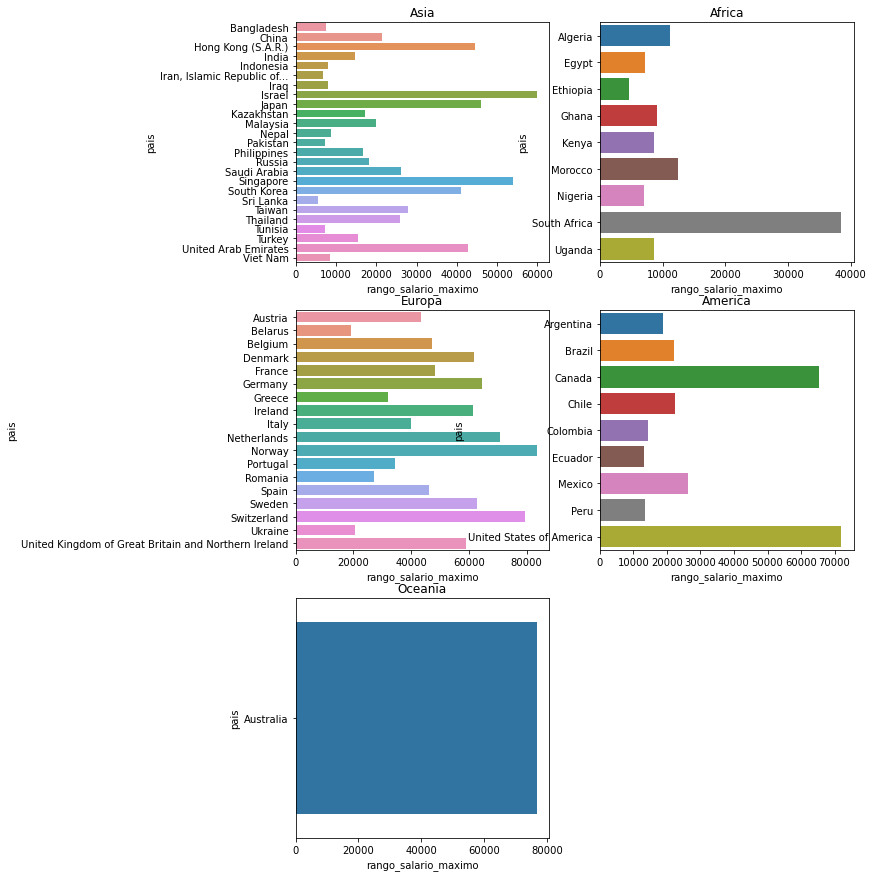

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
for i, col in enumerate(lista_continentes):
    sns.barplot(data=df_media_pais2[df_media_pais2["continente"] == col], x="rango_salario_maximo", y="pais", ax=axes[i])
    #plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)
    #axes[i].tick_params(rotation = 90)
    axes[i].set_title(col)

# eliminamos la última gráfica que está vacía
fig.delaxes(axes[-1])

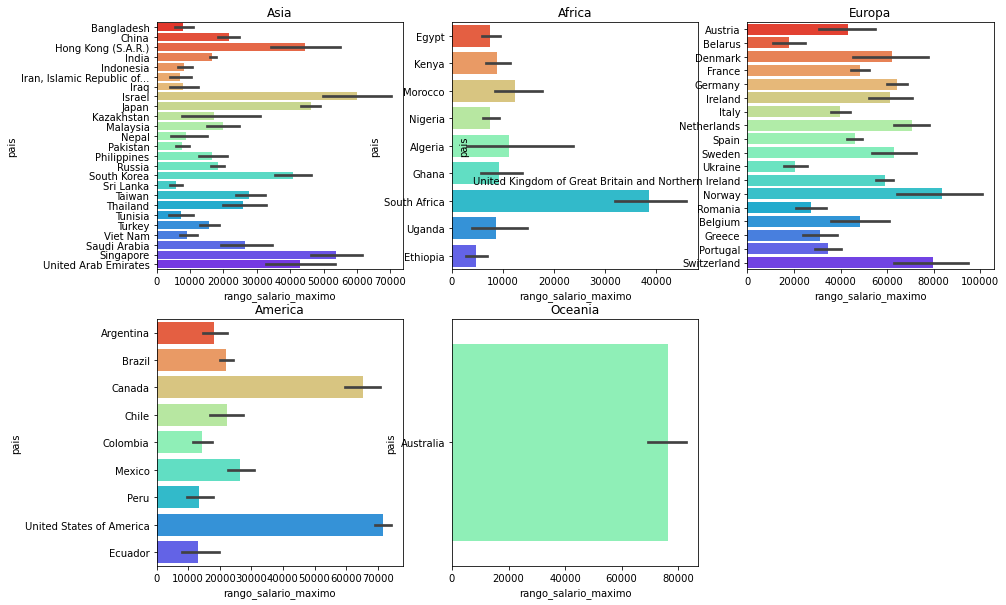

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
for i, col in enumerate(lista_continentes):
    sns.barplot(data=df_media_pais4[df_media_pais4["continente"] == col], x="rango_salario_maximo", y="pais", ax=axes[i], palette="rainbow_r")
    #sns.color_palette("Spectral")
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)
    #axes[i].tick_params(rotation = 90)
    axes[i].set_title(col)

# eliminamos la última gráfica que está vacía
fig.delaxes(axes[-1])

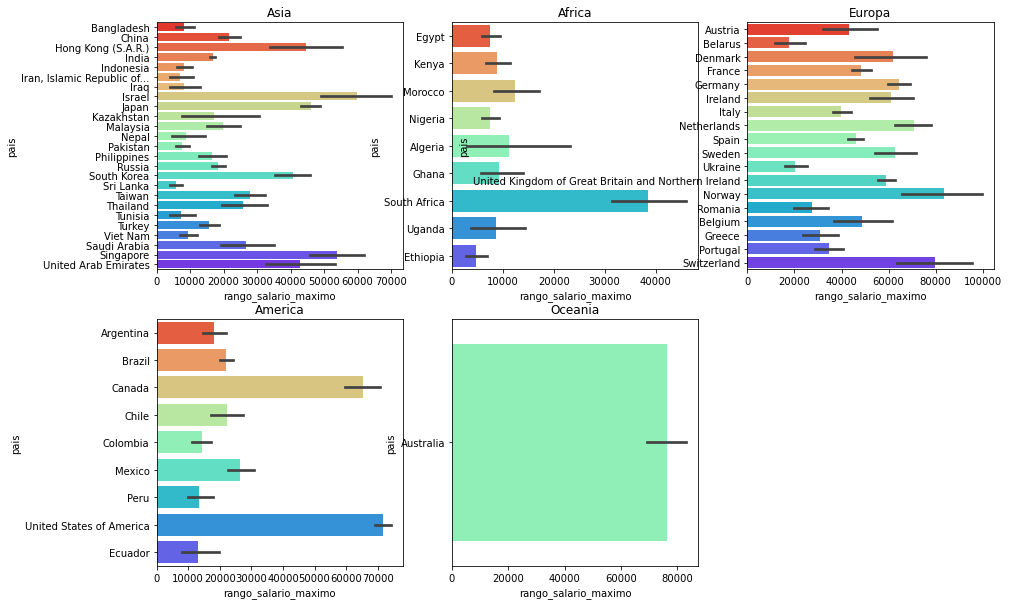

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
for i, col in enumerate(lista_continentes):
    sns.barplot(data=df_media_pais4[df_media_pais4["continente"] == col], x="rango_salario_maximo", y="pais", ax=axes[i], palette="rainbow_r")
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)
    #axes[i].tick_params(rotation = 90)
    axes[i].set_title(col)

# eliminamos la última gráfica que está vacía
fig.delaxes(axes[-1])

In [11]:
lista_paises = ["South Africa", "Morocco", "Algeria", "Israel", "Singapore", "Japan", "Norway", "Switzerland", "Netherlands", "Australia", "United States of America", "Canada", "Mexico"]

In [12]:
df_pais_top = df_media_pais4[df_media_pais4["pais"].isin(lista_paises)]
df_pais_top.head(2)

,edad,genero,pais,continente,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_maximo
3,18-21,Man,Australia,Oceania,< 1 years,$0-999,Academics/Education,Data Analyst,999.0
4,18-21,Man,Australia,Oceania,< 1 years,$0-999,Other,Data Scientist,999.0


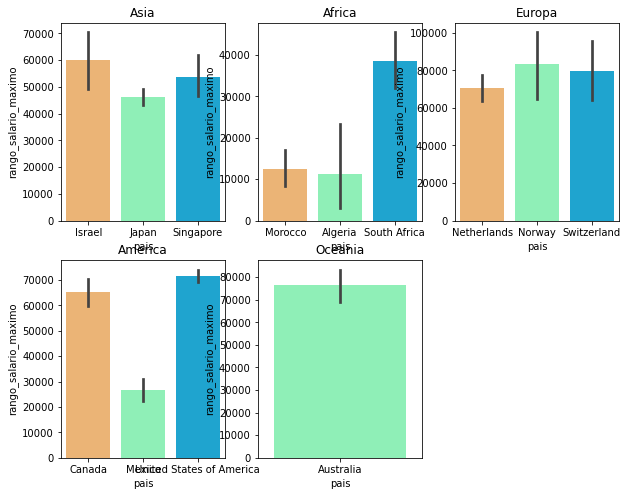

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
for i, col in enumerate(lista_continentes):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == col], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r")
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)
    #axes[i].tick_params(rotation = 90)
    axes[i].set_title(col)

# eliminamos la última gráfica que está vacía
fig.delaxes(axes[-1])

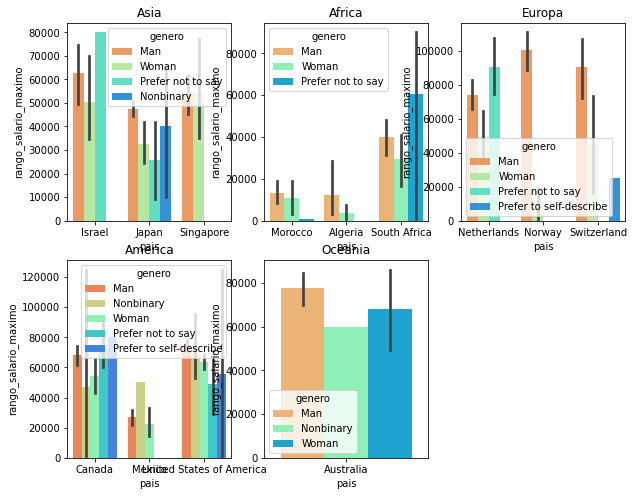

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
for i, col in enumerate(lista_continentes):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == col], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue="genero")
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3)
    #axes[i].tick_params(rotation = 90)
    axes[i].set_title(col)

# eliminamos la última gráfica que está vacía
fig.delaxes(axes[-1])

In [15]:
df_pais_top[df_pais_top["continente"] == "Asia"]

,edad,genero,pais,continente,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_maximo
301,18-21,Man,Israel,Asia,3-5 years,"25,000-29,999",Other,Other,29999.0
304,18-21,Man,Japan,Asia,1-3 years,$0-999,Computers/Technology,Data Engineer,999.0
305,18-21,Man,Japan,Asia,1-3 years,$0-999,Non-profit/Service,Program/Project Manager,999.0
306,18-21,Man,Japan,Asia,< 1 years,$0-999,Computers/Technology,Data Scientist,999.0
307,18-21,Man,Japan,Asia,I have never written code,$0-999,Marketing/CRM,Data Analyst,999.0
...,...,...,...,...,...,...,...,...,...
13236,70+,Man,Japan,Asia,20+ years,"40,000-49,999",Computers/Technology,Data Scientist,49999.0
13237,70+,Man,Japan,Asia,20+ years,"5,000-7,499",Academics/Education,Other,7499.0
13238,70+,Man,Japan,Asia,20+ years,"90,000-99,999",Academics/Education,Data Analyst,99999.0
13239,70+,Man,Japan,Asia,5-10 years,"90,000-99,999",Medical/Pharmaceutical,Research Scientist,99999.0


In [16]:
df_pais_top.columns

Index(['edad', 'genero', 'pais', 'continente', 'años_programando',
       'salario_anual', 'sector_trabajo_actual', 'puesto_trabajo',
       'rango_salario_maximo'],
      dtype='object')

In [17]:
df_pais_top["edad"].unique().tolist()

['18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70+']

No handles with labels found to put in legend.


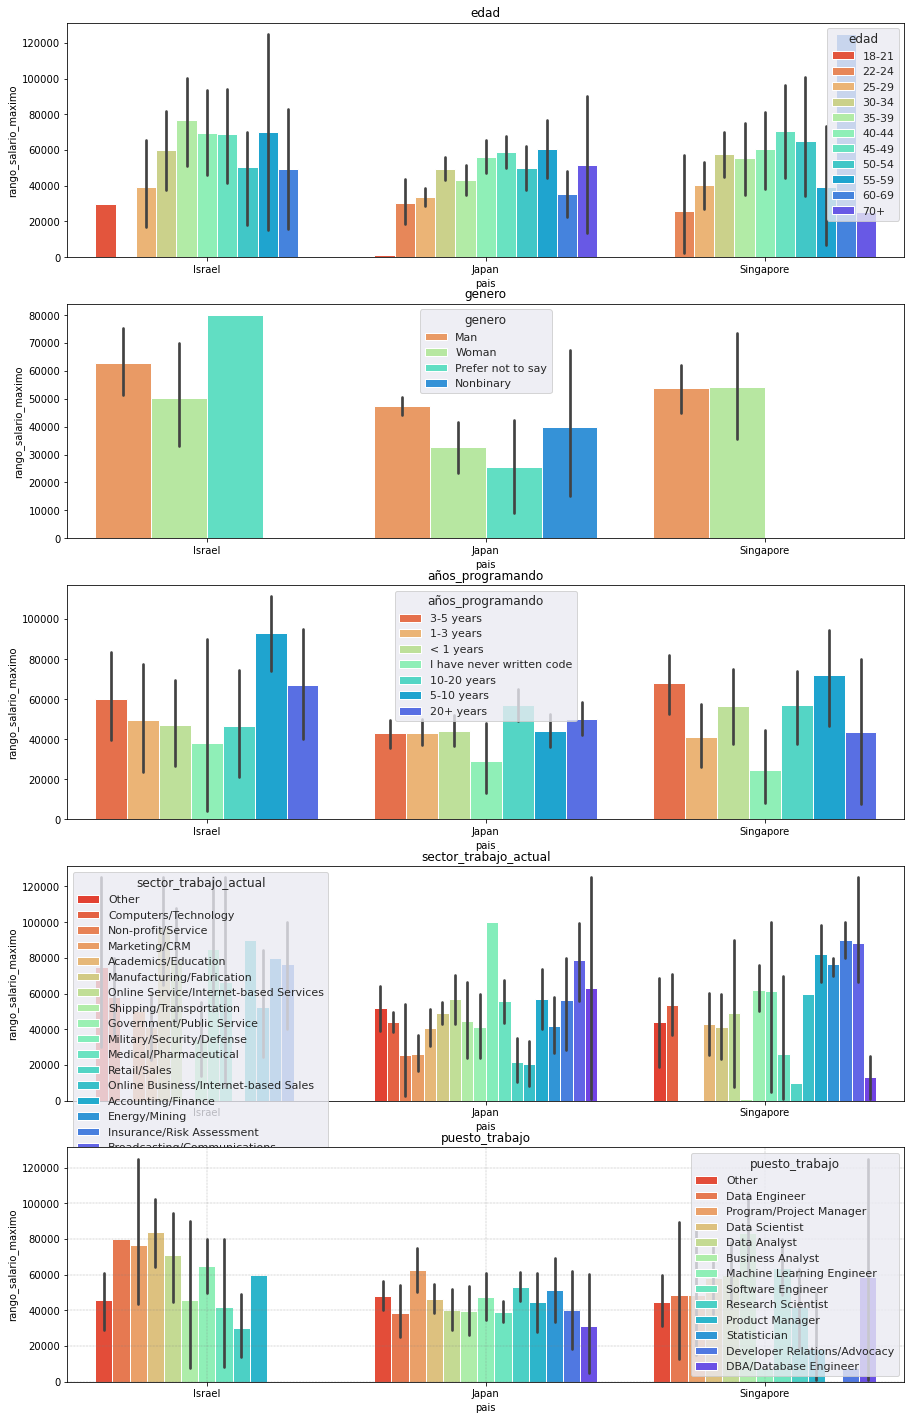

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,25))
sns.set(style="darkgrid")
plt.legend(loc = "best", bbox_to_anchor = (1,1))
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
for i, col in enumerate(lista_columnas):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Asia"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col)
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3,)
    #plt.legend(loc = "best", bbox_to_anchor = (1,1))
    #axes[i].tick_params(rotation = 90)
    axes[i].set_title(col)
#plt.legend(loc = "best", bbox_to_anchor = (1,1))

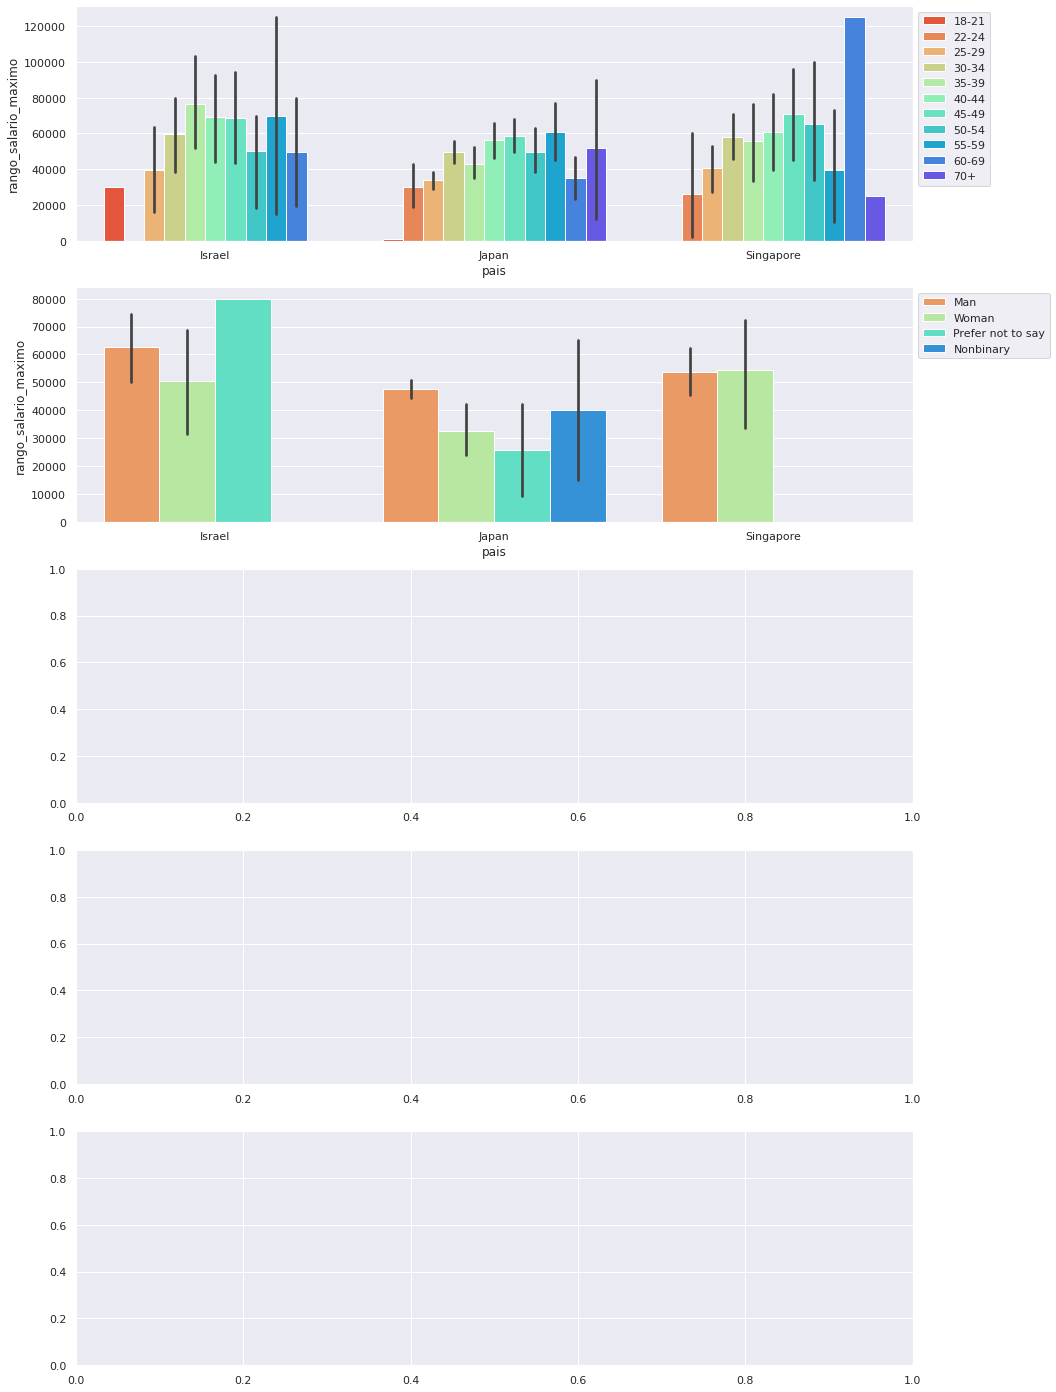

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,25))
sns.set(style="darkgrid")


lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Asia"], y="rango_salario_maximo", x="pais", ax=axes[0], palette="rainbow_r", hue="edad")
sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Asia"], y="rango_salario_maximo", x="pais", ax=axes[1], palette="rainbow_r", hue="genero")
axes[0].legend(loc = "best", bbox_to_anchor = (1,1))
axes[1].legend(loc = "best", bbox_to_anchor = (1,1))


/tmp/ipykernel_342/4269165389.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Asia"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/4269165389.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Asia"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/4269165389.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Asia"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/4269165389.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(da

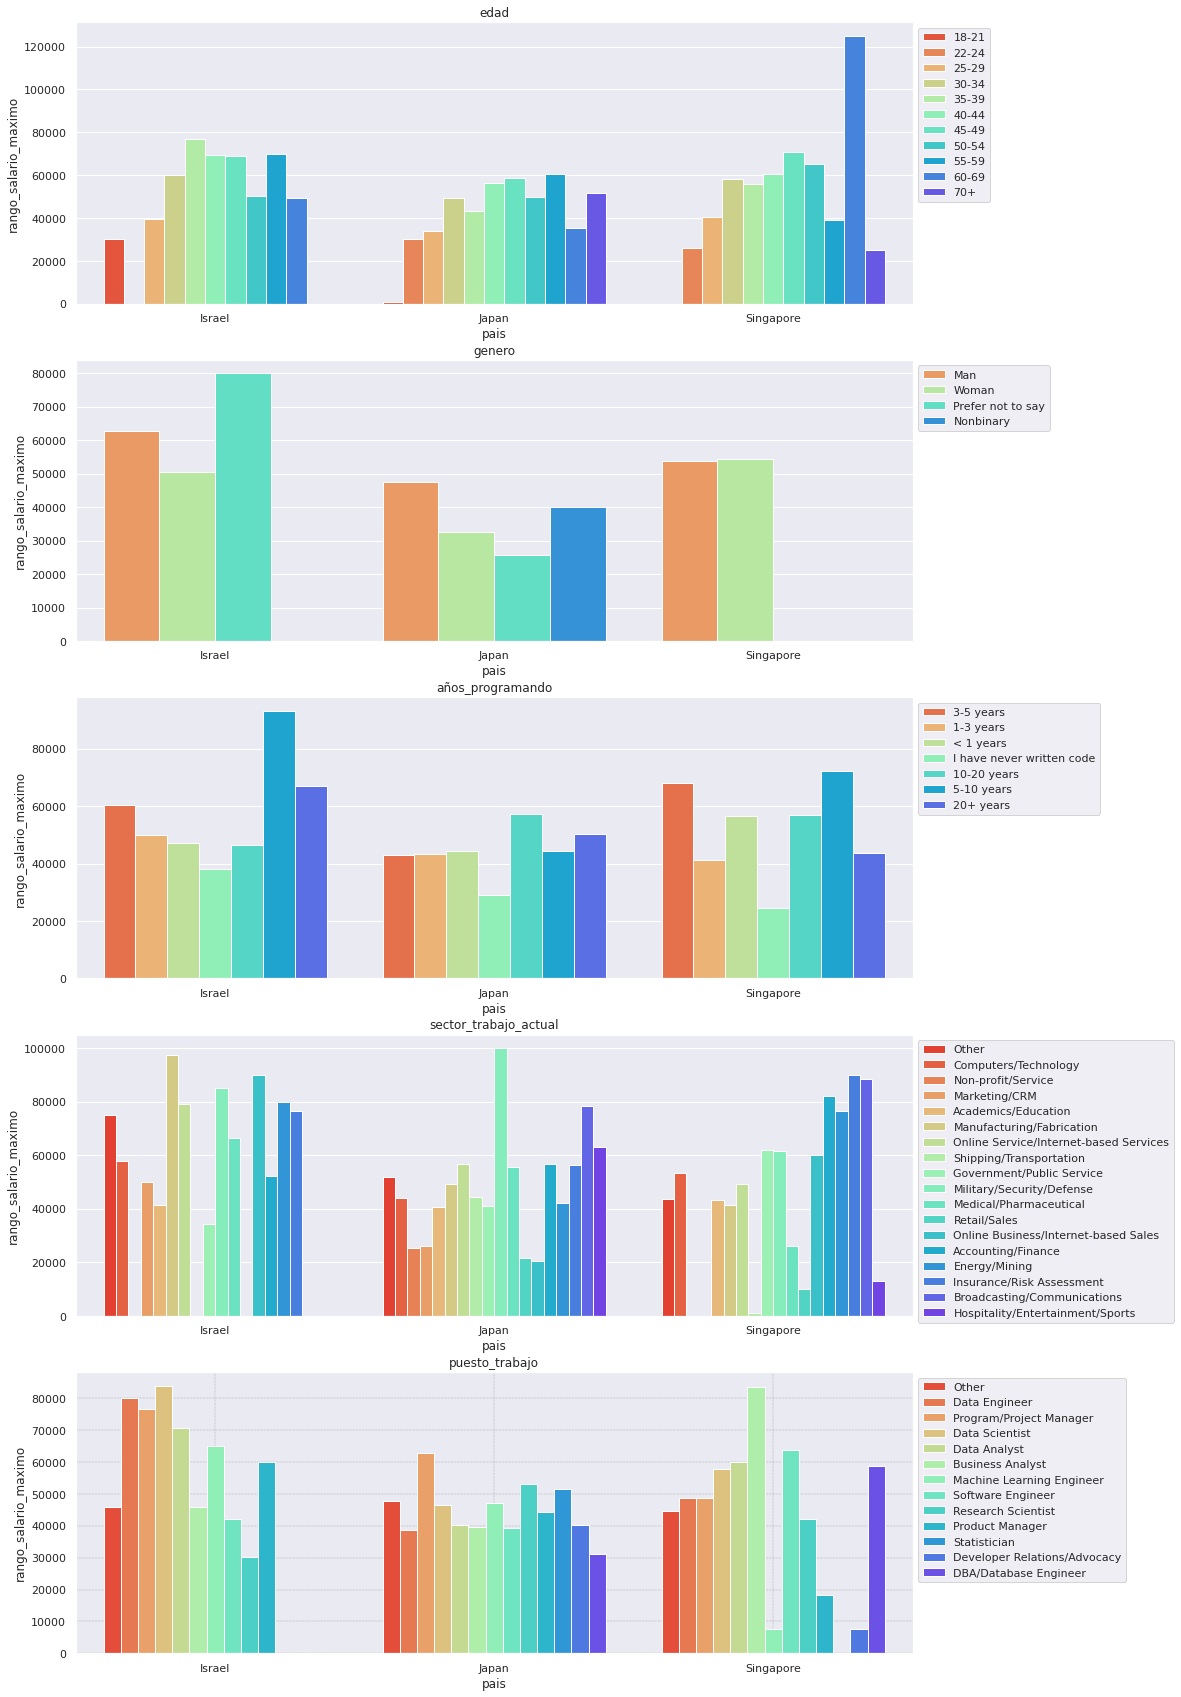

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
sns.set(style="darkgrid")
plt.title(label="Asia")
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
for i, col in enumerate(lista_columnas):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Asia"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
    # ci nos quita la barrita de std por cada una de las columnas
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3,)
    axes[i].set_title(col)
axes[0].legend(loc = "best", bbox_to_anchor = (1,1))
axes[1].legend(loc = "best", bbox_to_anchor = (1,1))
axes[2].legend(loc = "best", bbox_to_anchor = (1,1))
axes[3].legend(loc = "best", bbox_to_anchor = (1,1))
axes[4].legend(loc = "best", bbox_to_anchor = (1,1))

- Columna edad de Singapore.

¿Cuál es el desarrollo tecnológico de Singapur?
Ya en los años 60, el archipiélago de Singapur se convirtió en uno de los motores asiáticos relacionados con la producción de equipos electrónicos. Si el planeta demandaba transistores, ellos estudiaban, mejoraban y producían transistores.

- Columna puesto de trabajo en Singapore: Business Analyst

- Columna sector trabajo: Insurance/Risk Assessment

- Columna sector trabajo en Japan: Military / Security / Defense

- En Israel el rango de los años de experiencia en el trabajo, cobran más los de entre 5-10, que los de más de 20 años.

- En Singapore ligeramente cobran más las mujeres que los hombres.

/tmp/ipykernel_342/688148780.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Africa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/688148780.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Africa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/688148780.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Africa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/688148780.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(

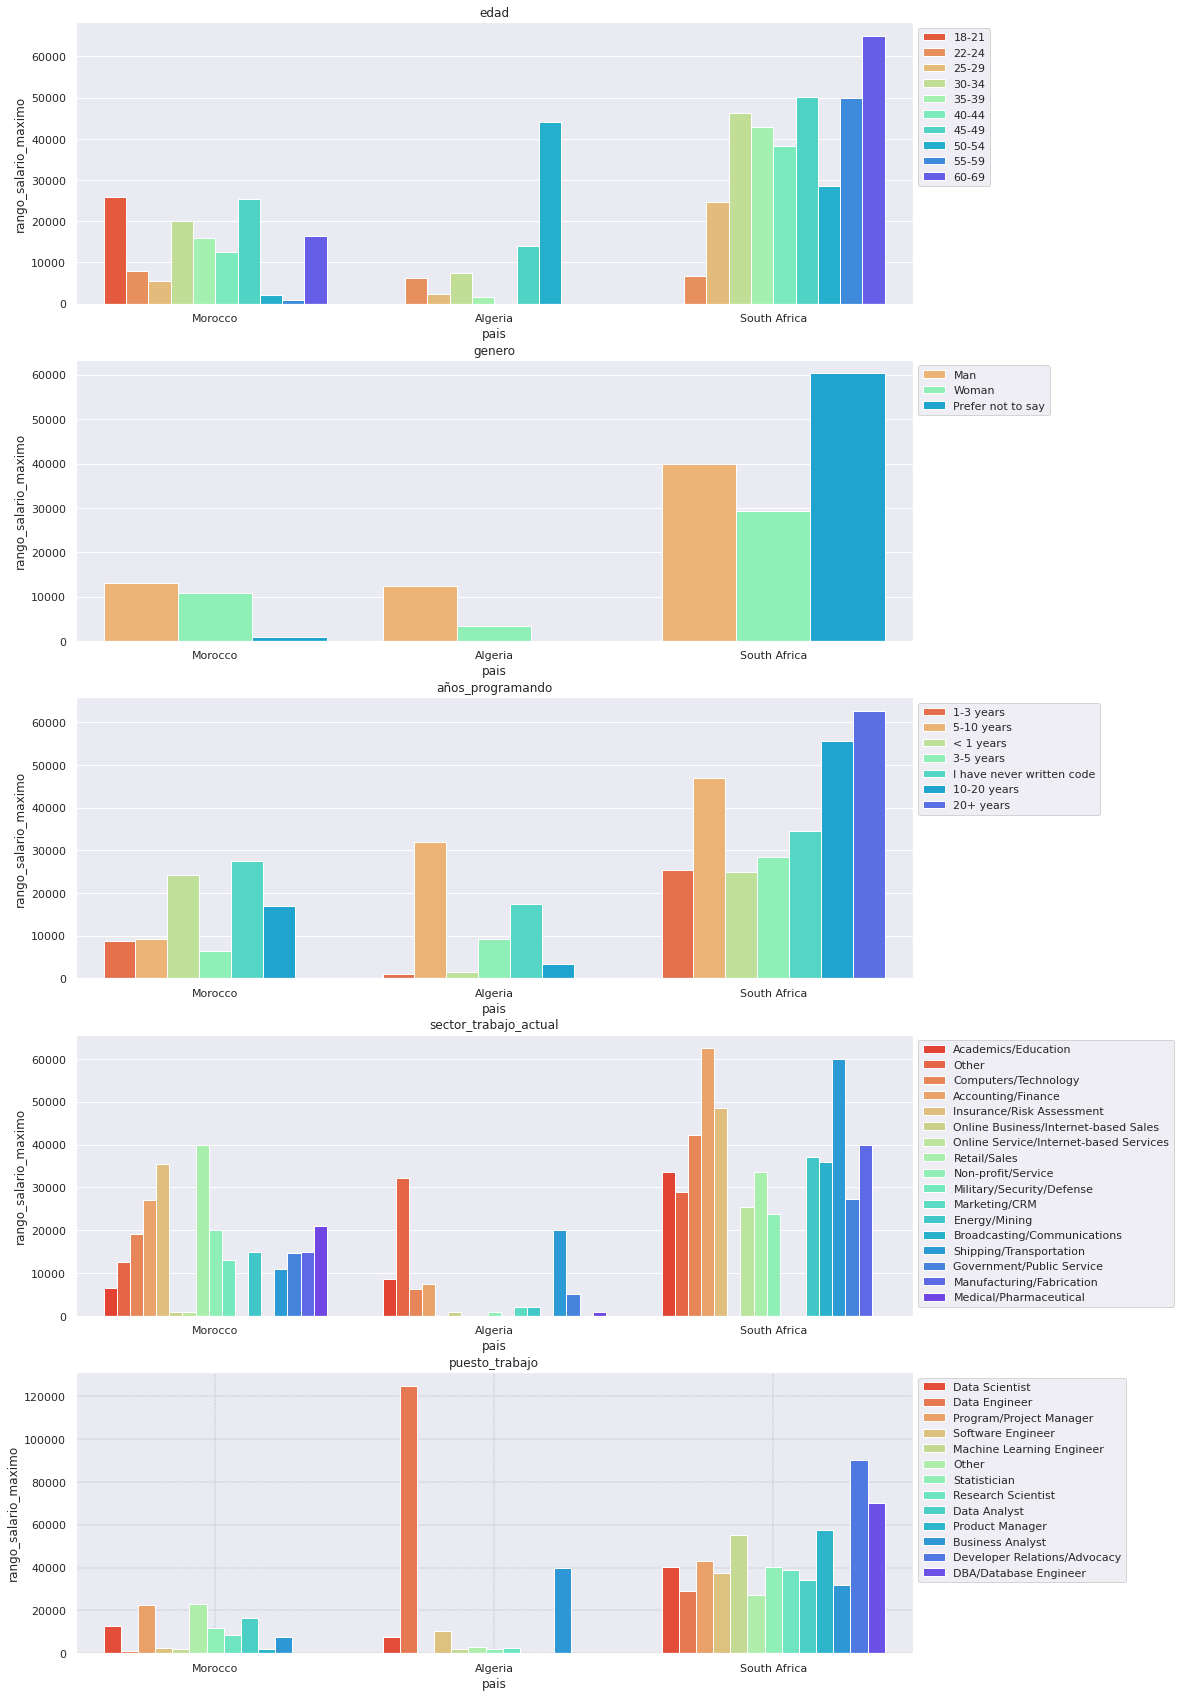

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
sns.set(style="darkgrid")
plt.title(label="Asia")
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
for i, col in enumerate(lista_columnas):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Africa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
    # ci nos quita la barrita de std por cada una de las columnas
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3,)
    axes[i].set_title(col)
axes[0].legend(loc = "best", bbox_to_anchor = (1,1))
axes[1].legend(loc = "best", bbox_to_anchor = (1,1))
axes[2].legend(loc = "best", bbox_to_anchor = (1,1))
axes[3].legend(loc = "best", bbox_to_anchor = (1,1))
axes[4].legend(loc = "best", bbox_to_anchor = (1,1))

En Africa nos llama la atención South Africa que está a un nivel diferente del resto de África. 
En Algeria hemos detectado que se está invirtiendo en el puesto de trabajo de Data Engineer.

In [22]:
df_pais_top[(df_pais_top["pais"] == "Netherlands") & ((df_pais_top["edad"] == "18-21"))]

,edad,genero,pais,continente,años_programando,salario_anual,sector_trabajo_actual,puesto_trabajo,rango_salario_maximo
329,18-21,Man,Netherlands,Europa,I have never written code,"90,000-99,999",Accounting/Finance,Business Analyst,99999.0


/tmp/ipykernel_342/2170502418.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Europa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/2170502418.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Europa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/2170502418.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Europa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/2170502418.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barp

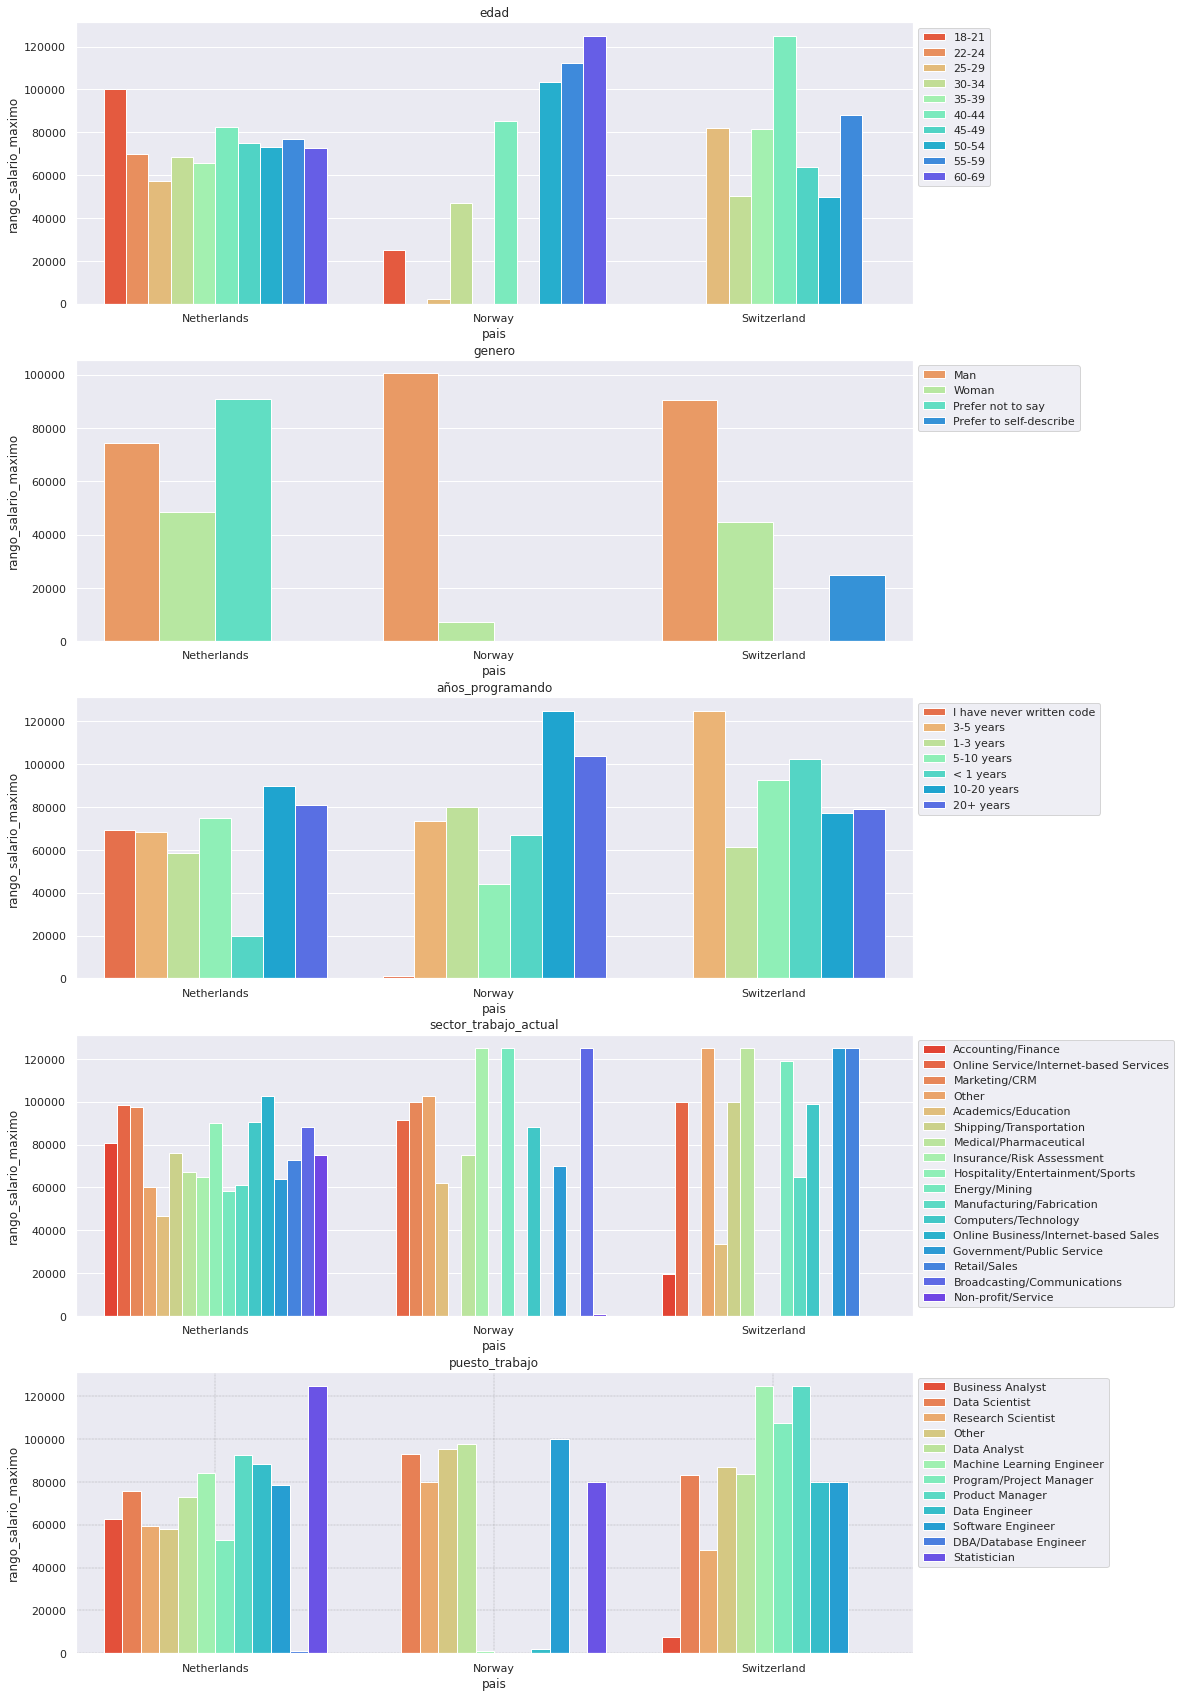

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
sns.set(style="darkgrid")
plt.title(label="Asia")
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
for i, col in enumerate(lista_columnas):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Europa"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
    # ci nos quita la barrita de std por cada una de las columnas
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3,)
    axes[i].set_title(col)
axes[0].legend(loc = "best", bbox_to_anchor = (1,1))
axes[1].legend(loc = "best", bbox_to_anchor = (1,1))
axes[2].legend(loc = "best", bbox_to_anchor = (1,1))
axes[3].legend(loc = "best", bbox_to_anchor = (1,1))
axes[4].legend(loc = "best", bbox_to_anchor = (1,1))

/tmp/ipykernel_342/3353840669.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "America"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/3353840669.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "America"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/3353840669.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "America"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/3353840669.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.b

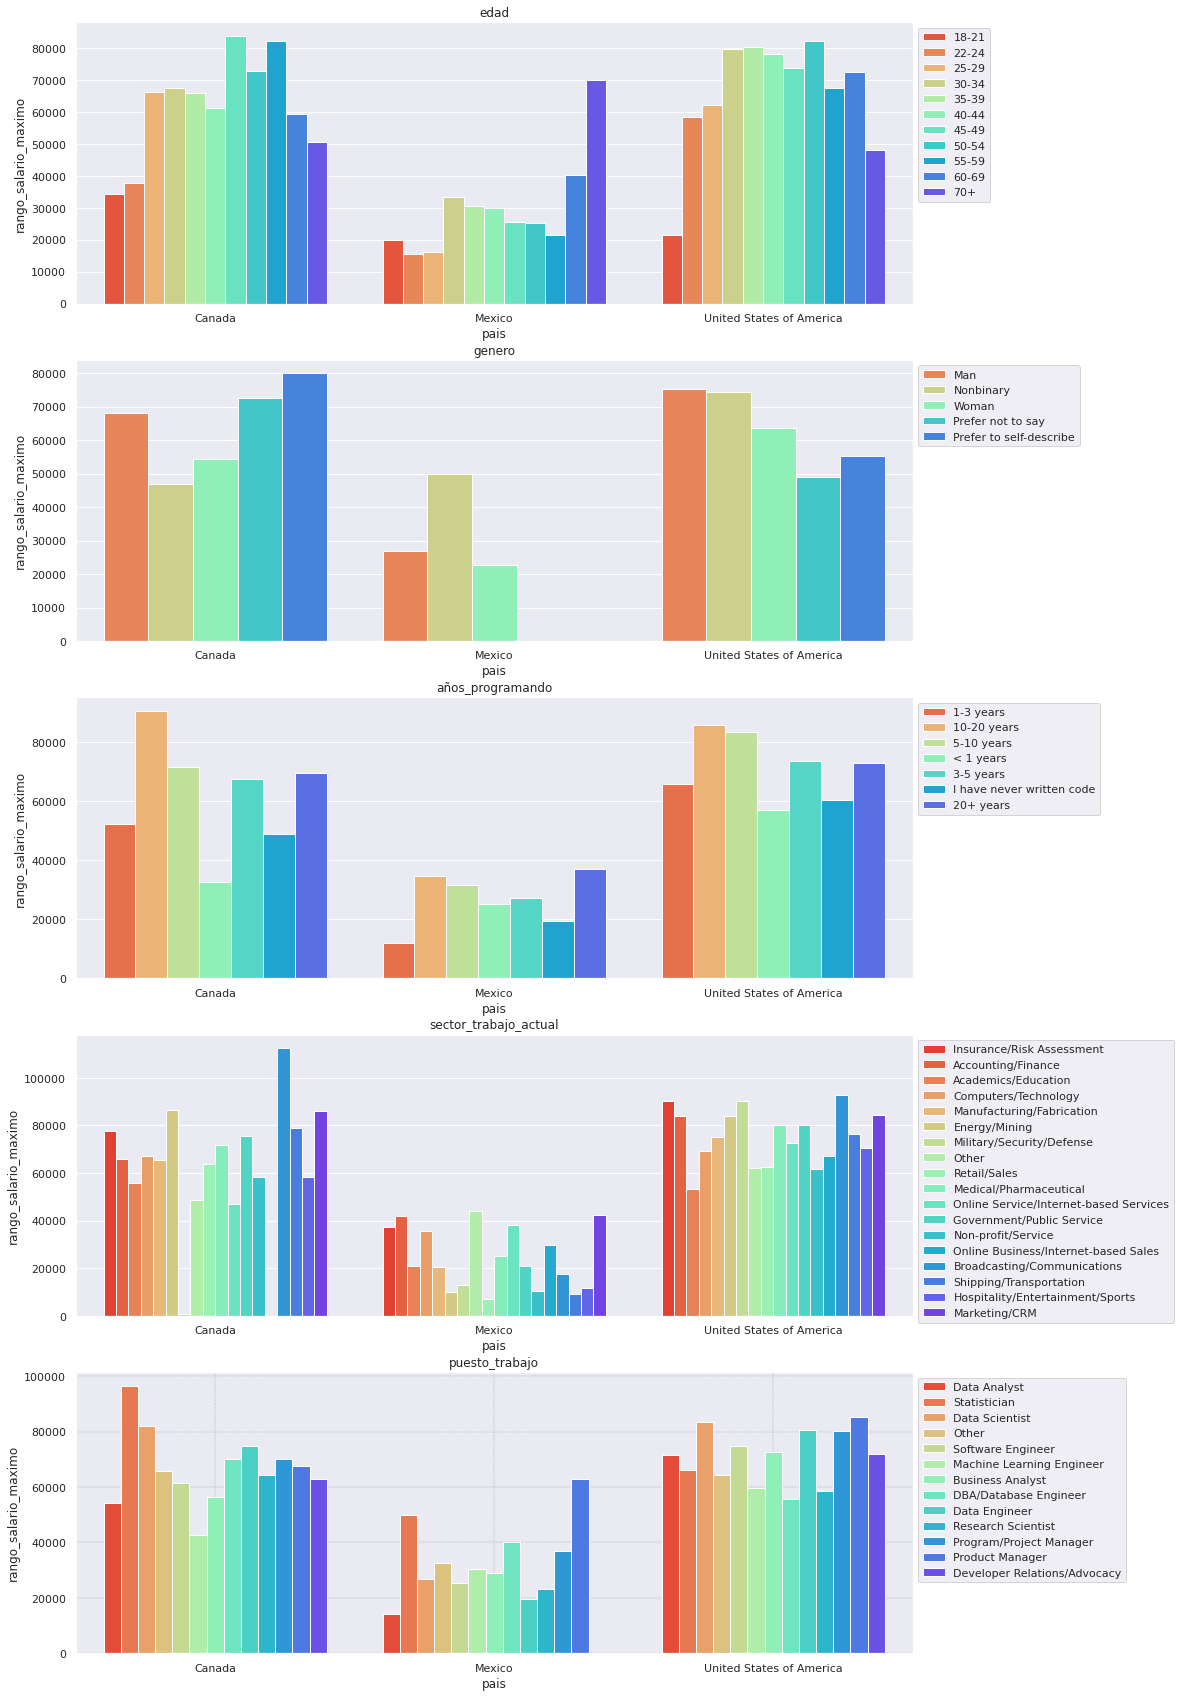

In [24]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
sns.set(style="darkgrid")
plt.title(label="Asia")
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
for i, col in enumerate(lista_columnas):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == "America"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
    # ci nos quita la barrita de std por cada una de las columnas
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3,)
    axes[i].set_title(col)
axes[0].legend(loc = "best", bbox_to_anchor = (1,1))
axes[1].legend(loc = "best", bbox_to_anchor = (1,1))
axes[2].legend(loc = "best", bbox_to_anchor = (1,1))
axes[3].legend(loc = "best", bbox_to_anchor = (1,1))
axes[4].legend(loc = "best", bbox_to_anchor = (1,1))

/tmp/ipykernel_342/1694374054.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Oceania"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/1694374054.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Oceania"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/1694374054.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Oceania"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/1694374054.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.b

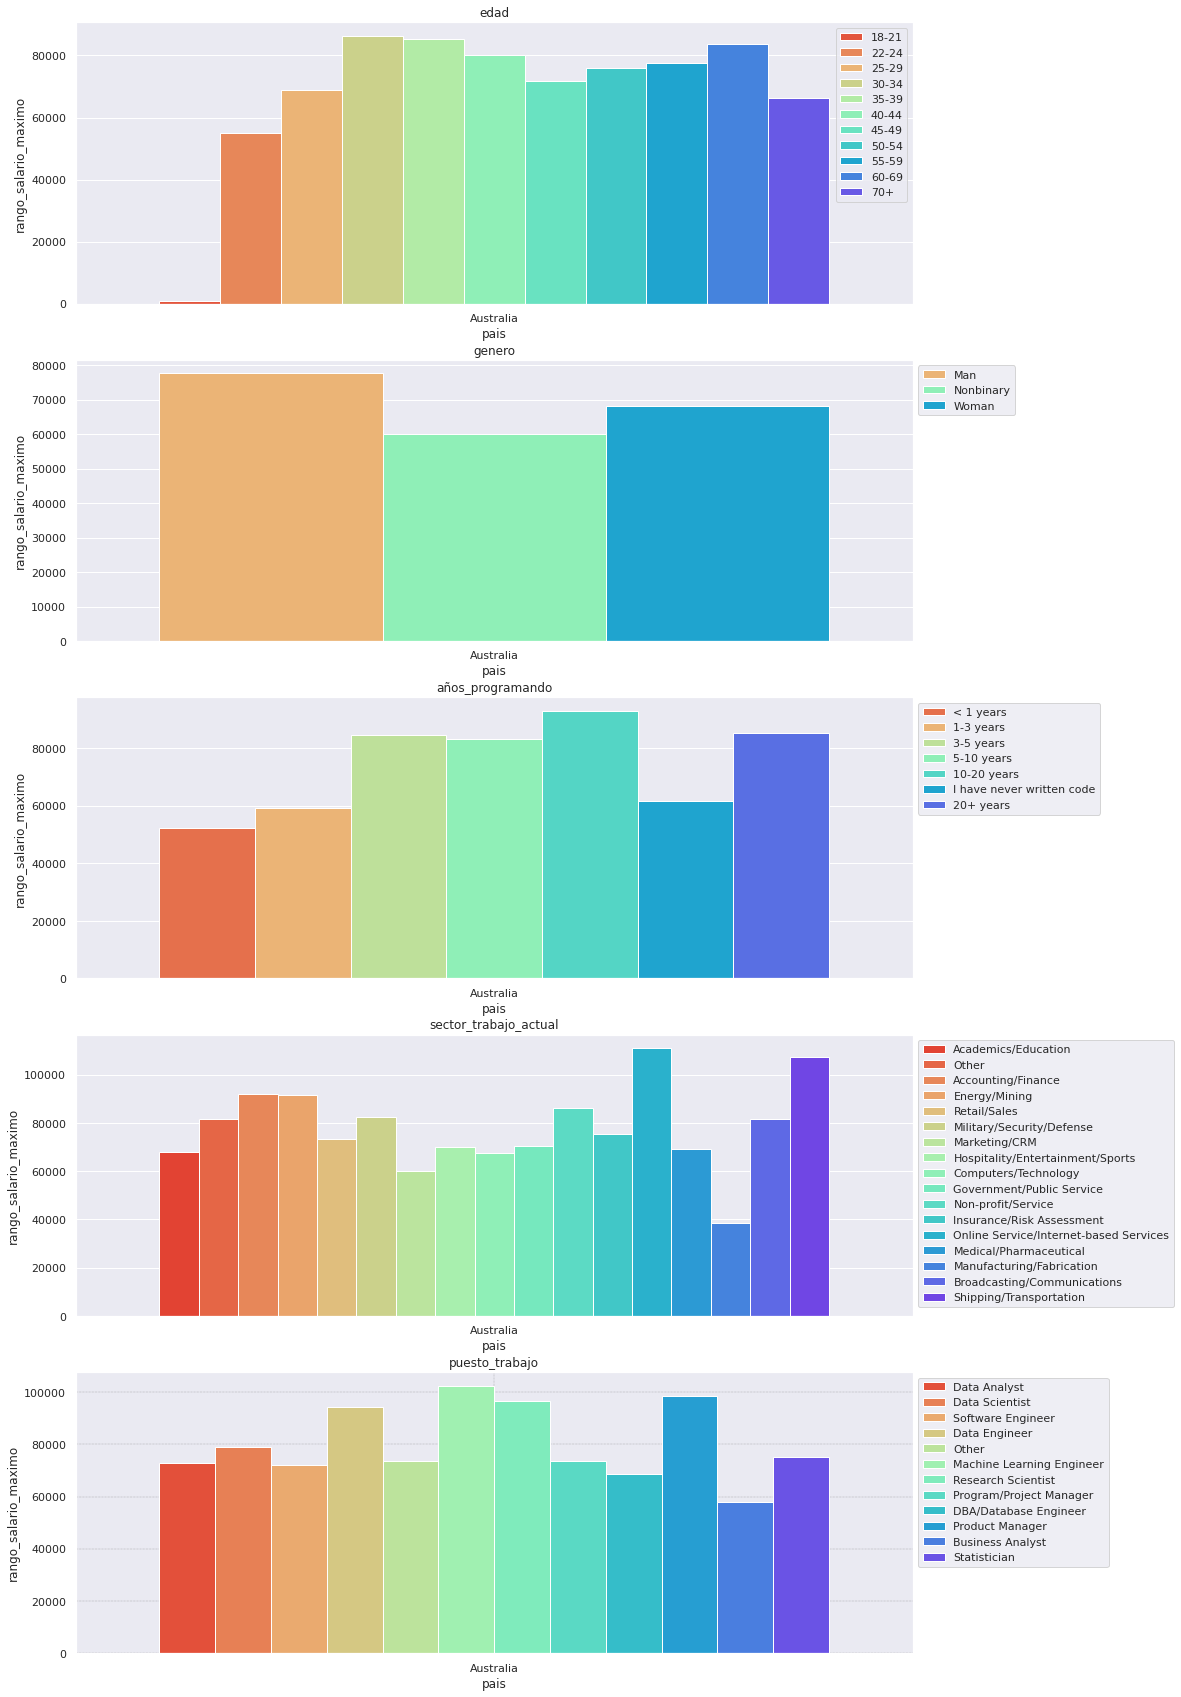

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
sns.set(style="darkgrid")
plt.title(label="Asia")
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
for i, col in enumerate(lista_columnas):
    sns.barplot(data=df_pais_top[df_pais_top["continente"] == "Oceania"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
    # ci nos quita la barrita de std por cada una de las columnas
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3,)
    axes[i].set_title(col)
axes[0].legend(loc = "best", bbox_to_anchor = (1,1))
axes[1].legend(loc = "best", bbox_to_anchor = (1,1))
axes[2].legend(loc = "best", bbox_to_anchor = (1,1))
axes[3].legend(loc = "best", bbox_to_anchor = (1,1))
axes[4].legend(loc = "best", bbox_to_anchor = (1,1))

In [35]:
df_pais_top["pais"].value_counts()

United States of America    1138
Japan                        606
Canada                       199
Mexico                       187
Australia                    148
Netherlands                  104
Singapore                    101
South Africa                  90
Morocco                       72
Israel                        67
Switzerland                   31
Norway                        22
Algeria                       22
Name: pais, dtype: int64

In [33]:
pd.options.display.max_columns=None

In [34]:
holi= pd.DataFrame(df["pais"].value_counts())
holi.T

,India,United States of America,Other,Japan,Brazil,Russia,Nigeria,China,Spain,United Kingdom of Great Britain and Northern Ireland,Pakistan,Germany,Egypt,Turkey,France,Indonesia,Italy,South Korea,Canada,Mexico,Taiwan,Poland,Colombia,Viet Nam,Australia,Bangladesh,Argentina,Kenya,Ukraine,Netherlands,Singapore,"Iran, Islamic Republic of...",Malaysia,South Africa,Portugal,Chile,Peru,Thailand,Morocco,Greece,United Arab Emirates,Israel,Saudi Arabia,Ireland,Philippines,Ghana,Sweden,Sri Lanka,Tunisia,Romania,Hong Kong (S.A.R.),Czech Republic,Belgium,Nepal,Austria,Belarus,Ecuador,Switzerland,Ethiopia,Denmark,Iraq,Uganda,I do not wish to disclose my location,Algeria,Kazakhstan,Norway
pais,3307,1166,806,631,539,494,428,350,331,315,294,284,283,283,268,241,223,216,199,190,184,157,156,153,150,145,133,132,120,105,101,94,92,90,83,79,79,74,72,72,67,67,60,59,57,56,55,55,50,47,46,42,39,36,35,34,33,31,30,29,28,24,22,22,22,22


/tmp/ipykernel_342/3335285015.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df["pais"] == "Spain"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/3335285015.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df["pais"] == "Spain"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/3335285015.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df["pais"] == "Spain"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
/tmp/ipykernel_342/3335285015.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df["pais"] == "Spain"], y="rango_salario_maximo", x="pais", ax=

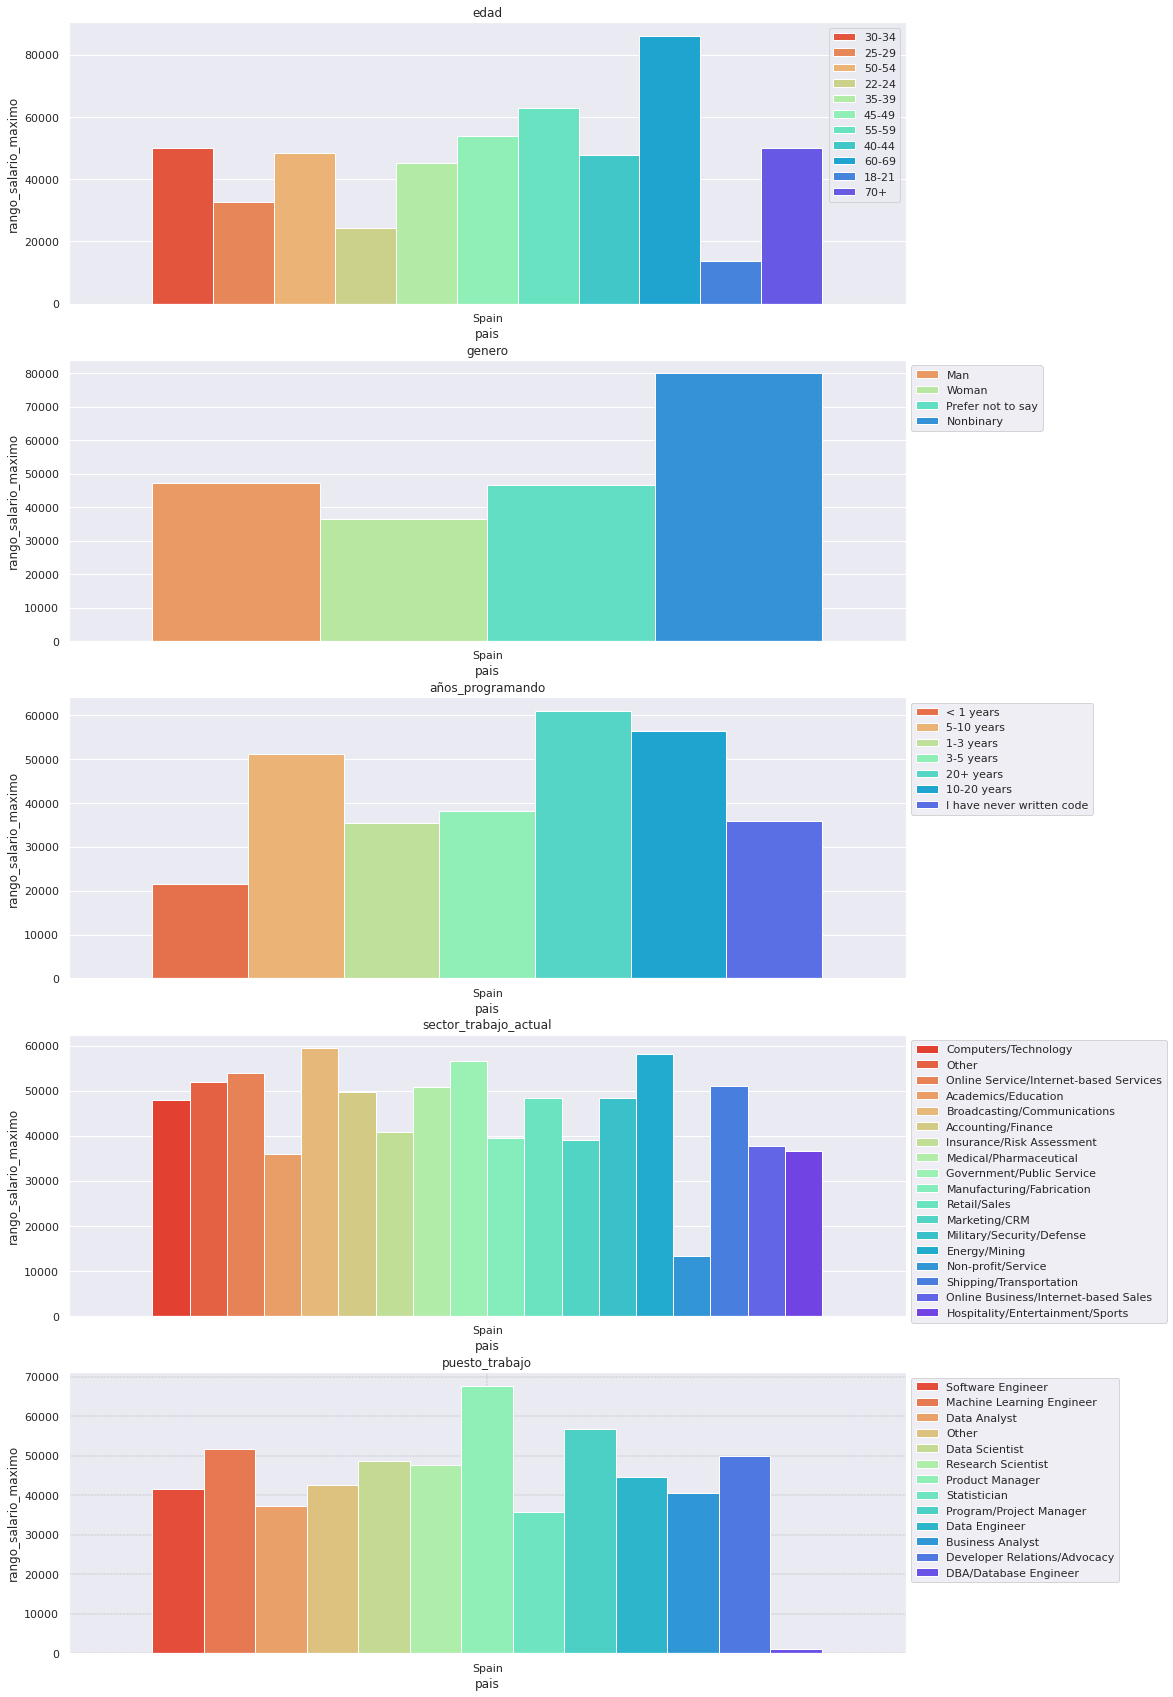

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,30))
sns.set(style="darkgrid")
plt.title(label="Asia")
axes = axes.flat
lista_continentes = ["Asia", "Africa", "Europa", "America", "Oceania"]
lista_columnas = ['edad', 'genero','años_programando','sector_trabajo_actual', 'puesto_trabajo']
for i, col in enumerate(lista_columnas):
    sns.barplot(data=df[df["pais"] == "Spain"], y="rango_salario_maximo", x="pais", ax=axes[i], palette="rainbow_r", hue=col, ci=None)
    # ci nos quita la barrita de std por cada una de las columnas
    plt.grid(color = 'grey' , linestyle= '-.', linewidth = 0.3,)
    axes[i].set_title(col)
axes[0].legend(loc = "best", bbox_to_anchor = (1,1))
axes[1].legend(loc = "best", bbox_to_anchor = (1,1))
axes[2].legend(loc = "best", bbox_to_anchor = (1,1))
axes[3].legend(loc = "best", bbox_to_anchor = (1,1))
axes[4].legend(loc = "best", bbox_to_anchor = (1,1))